## Human Activity Recoginition dataset
* Human Activity Recognisation-HAR- has emarged as a key research area in the
  last years and is gaining increasing attention by by the pervasive computing
  research community, especially for the developement of context aware-systems.
  There are many potential applications of HAR, like: elderly monitoring, life
  long system for monitoring energy expendititure and for supporting weight loss
  programe, and digital assistant for weight lifting exercise.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# import data
training=pd.read_csv('har_train.csv')
test=pd.read_csv('har_validate.csv')
training.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [4]:
training.shape

(13737, 53)

In [5]:
training.columns

Index(['classe', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'ma

In [6]:
test.shape

(5885, 53)

In [8]:
training['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [9]:
training['classe'].value_counts()

A    3906
B    2658
E    2525
C    2396
D    2252
Name: classe, dtype: int64

In [10]:
training['classe'].value_counts()/len(training['classe'])

A    0.284342
B    0.193492
E    0.183810
C    0.174419
D    0.163937
Name: classe, dtype: float64

In [12]:
# Create the X and Y
X_train=training.drop('classe',axis=1)
y_train=training['classe']

X_test=test.drop('classe',axis=1)
y_test=test['classe']

In [13]:
y_train

0        A
1        A
2        A
3        A
4        A
        ..
13732    E
13733    E
13734    E
13735    E
13736    E
Name: classe, Length: 13737, dtype: object

In [14]:
y_test

0       A
1       A
2       A
3       A
4       A
       ..
5880    E
5881    E
5882    E
5883    E
5884    E
Name: classe, Length: 5885, dtype: object

In [16]:
# Init the gaussian classifier
model=GaussianNB()
# Train the model
model.fit(X_train,y_train)

GaussianNB()

In [18]:
# Predict output
pred=model.predict(X_test)
mat=confusion_matrix(y_test,pred)
print(mat)

[[1070   95  262  212   35]
 [ 127  685  145   76  106]
 [ 223  106  512  136   49]
 [ 102   35  271  441  115]
 [  51  239   95  143  554]]


In [25]:
pip install plot-confusion-matrix

In [26]:
from plot_confusion_matrix import confusion_matrix

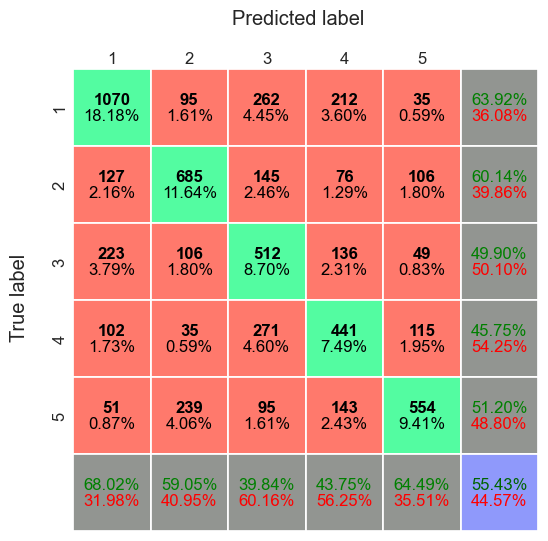

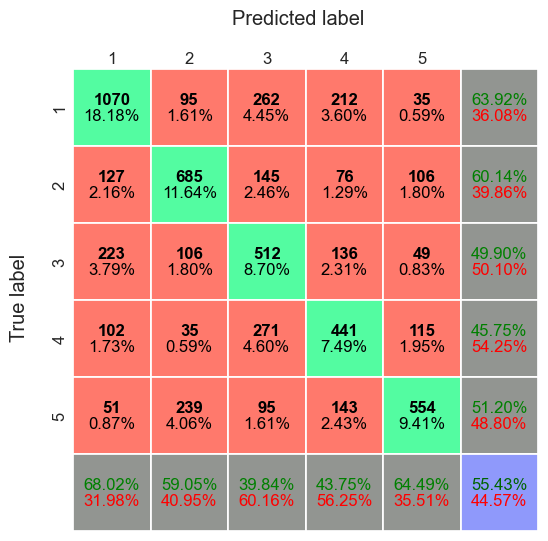

In [27]:
confusion_matrix(mat)

In [28]:
# printing the precision and recall, among other metrics
print(classification_report(pred,y_test,labels=['A','B','C','D','E']))

              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885

